In [12]:
import  cv2,matplotlib #mengimport libary open cv yang digunakan untuk memproses gambar dan video dan dapat mengekstrak informasi, untuk matplotib akan digunakan untuk melakukan visualisasi data
import numpy as np #mengimport libary numpy untuk mengoperasikan vektor atau matriks
from matplotlib import pyplot as plt #mengimport pyplot untuk melakukan perbuahan pada gambar seperti membuat gambar,membuat plot dll
from matplotlib import image as im #mengimport libary image yang digunakan untuk membaca suata gambar

In [13]:
mat=np.array([[3,7,7,8,10,12,14,10],
            [2,0,0,0,1,8,15,15],
            [14,6,5,9,8,10,9,12],
            [12,12,11,8,8,10,11,1],
            [0,2,3,4,5,13,10,14],
            [4,5,0,0,1,0,2,2],
            [15,13,11,10,9,9,8,7],
            [2,1,0,10,11,14,13,12]])
print (mat) #membuat serta menampilkan array dengan ukuran 8x8

[[ 3  7  7  8 10 12 14 10]
 [ 2  0  0  0  1  8 15 15]
 [14  6  5  9  8 10  9 12]
 [12 12 11  8  8 10 11  1]
 [ 0  2  3  4  5 13 10 14]
 [ 4  5  0  0  1  0  2  2]
 [15 13 11 10  9  9  8  7]
 [ 2  1  0 10 11 14 13 12]]


In [14]:
warna=np.array([i for i in range (16)])
print (warna) #membuat suatu array sebagai derajat keabuan

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]


In [15]:
k=np.zeros(16) #membuat array kosong dengan 16 kolom (sama seperti derajat keabuan)
for i in mat: 
    for j in i:#melakukan nested loop di matriks yang bernama mat untuk mencari banyaknya suatu derajat keabuan
        k[j]+=1 #menambah 1 atau me increment ke array kosong jika terdapat nilai dari derajat keabuan pada matriks
print (k)

[8. 4. 5. 2. 2. 3. 1. 3. 6. 4. 7. 4. 5. 3. 4. 3.]


In [16]:
for x in range (16):
    k[x]/=64 #membagi seluruhnya dengan 64 dimana didapatkan dari ukuran matriks
print (k)

[0.125    0.0625   0.078125 0.03125  0.03125  0.046875 0.015625 0.046875
 0.09375  0.0625   0.109375 0.0625   0.078125 0.046875 0.0625   0.046875]


<function matplotlib.pyplot.show(close=None, block=None)>

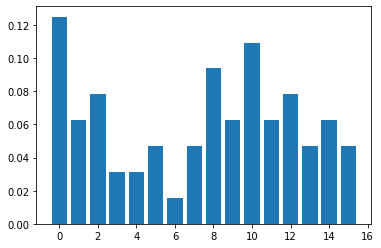

In [17]:
plt.bar(warna,k) #membuat histogram dengan variable warna di sumbu x dan k di sumbu y
plt.show #menampilkan histogram

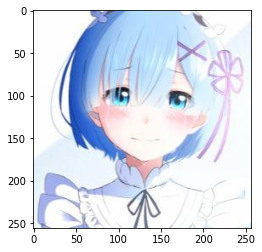

In [18]:
img=im.imread('waifu.jpg')#membaca gambar 
plt.imshow(img) #menambilkan gambar

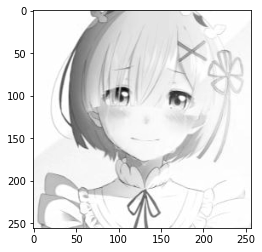

In [19]:
gray_img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) #mengubah gambar menjadi gray dengan menggunakan libary cv2
plt.imshow(gray_img,cmap='gray') #menampilkan gambar hasil gray scale dan menambah argument cmap untuk memetakan warna menjadi abu      


In [20]:
print (gray_img) #menampilkan gambar dalam bentuk array

[[254 254 254 ... 254 254 254]
 [254 254 254 ... 254 254 254]
 [254 254 254 ... 254 254 254]
 ...
 [247 246 246 ... 246 238 231]
 [244 247 250 ... 242 239 237]
 [244 248 250 ... 239 240 241]]


In [21]:
vol=np.array([[-1,1,-1],[1,1,1],[-1,1,-1]]) #menginisialisasi sebuah array yang nantinya akan jadi kernel untuk prosesn konvolusi
template=np.zeros(gray_img.shape)#membuat array kosong dengan ukuran yang sama seperti gambar yang sudah grayscale
for r in range (254):
    for cl in range (254): #melakukan nested loop dengan range 254 (karena ada padding) untuk menghitung setiap pixel di matriks
        template[r][cl]=gray_img[r][cl]*vol[0][0]+gray_img[r][cl+1]*vol[0][1]+gray_img[r][cl+2]*vol[0][2]+gray_img[r+1][cl]*vol[1][0]+gray_img[r+1][cl+1]*vol[1][1]+gray_img[r+1][cl+2]*vol[1][2]+gray_img[r+2][cl]*vol[2][0]+gray_img[r+2][cl+1]*vol[2][1]+gray_img[r+2][cl+2]*vol[2,2] #rumus perhitungan konvolusi dimana setiap baris dan kolom akan dikalikan lalu di dijumlahkan semua
template #menampilkan hasil konvolusi

array([[254., 254., 254., ..., 254.,   0.,   0.],
       [254., 254., 254., ..., 254.,   0.,   0.],
       [254., 254., 254., ..., 254.,   0.,   0.],
       ...,
       [248., 256., 255., ..., 239.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.]])

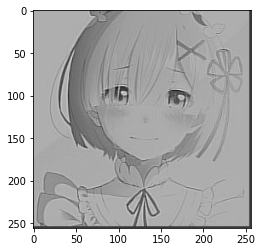

In [22]:
plt.imshow(template,cmap='gray') #menampilkan gambar yang sudah dilakukan konvolusi dan tetap graysccale